In [10]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys
print(sys.version)

3.12.8 (main, Jul  3 2025, 14:08:45) [Clang 16.0.0 (clang-1600.0.26.3)]


In [2]:
sys.path.append('../')
import src.api.espn as espn
import src.data.reader_weekly_offdef as weekly_reader
import src.data.reader_weekly_results as weekly_results_reader
import src.analytics.game_team_stats as game_team_stats
import src.analytics.scatter_matrix as scatter_matrix

### sample defensive data

In [5]:
print("Reading defensive stats for 2022, week 6...")
def_data = weekly_reader.read_weekly_file(2022, 6, 'def', normalize=False)

Reading defensive stats for 2022, week 6...
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/def.csv


In [6]:
print(f"Loaded data shape: {def_data.shape}")
print(f"Available columns: {list(def_data.columns)}")
print("\nFirst few rows:")
print(def_data.head())

Loaded data shape: (32, 30)
Available columns: ['Rk', 'Tm', 'G', 'PA', 'Yds', 'TotYdsPlusTOPly', 'TotYdsPlusTOYPerP', 'TotYdsPlusTOTO', 'FL', '1stD', 'PassingCmp', 'PassingAtt', 'PassingYds', 'PassingTD', 'PassingInt', 'PassingNYPerA', 'Passing1stD', 'RushingAtt', 'RushingYds', 'RushingTD', 'RushingYPerA', 'Rushing1stD', 'PenaltiesPen', 'PenaltiesYds', 'Penalties1stPy', 'Sc%', 'TO%', 'EXP', 'year', 'week']

First few rows:
   Rk                    Tm  G  PA   Yds  TotYdsPlusTOPly  TotYdsPlusTOYPerP  \
0   1         Buffalo Bills  5  61  1302              294                4.4   
1   2   San Francisco 49ers  5  61  1246              311                4.0   
2   3        Dallas Cowboys  5  72  1557              331                4.7   
3   4        Denver Broncos  5  80  1445              307                4.7   
4   5  Jacksonville Jaguars  5  80  1569              309                5.1   

   TotYdsPlusTOTO  FL  1stD  ...  RushingYPerA  Rushing1stD  PenaltiesPen  \
0              

In [7]:
print(f"\nData types:")
print(def_data.dtypes)


Data types:
Rk                     Int64
Tm                    object
G                      Int64
PA                     Int64
Yds                    Int64
TotYdsPlusTOPly        Int64
TotYdsPlusTOYPerP    float64
TotYdsPlusTOTO         Int64
FL                     Int64
1stD                   Int64
PassingCmp             Int64
PassingAtt             Int64
PassingYds             Int64
PassingTD              Int64
PassingInt             Int64
PassingNYPerA        float64
Passing1stD            Int64
RushingAtt             Int64
RushingYds             Int64
RushingTD              Int64
RushingYPerA         float64
Rushing1stD            Int64
PenaltiesPen           Int64
PenaltiesYds           Int64
Penalties1stPy         Int64
Sc%                  float64
TO%                  float64
EXP                  float64
year                   int64
week                   int64
dtype: object



Creating matplotlib scatter matrix...
Creating scatter matrix for columns: ['PA', 'Yds', 'TotYdsPlusTOPly', 'TotYdsPlusTOYPerP', 'TotYdsPlusTOTO', 'FL', '1stD', 'PassingCmp']


<Figure size 1500x1200 with 0 Axes>

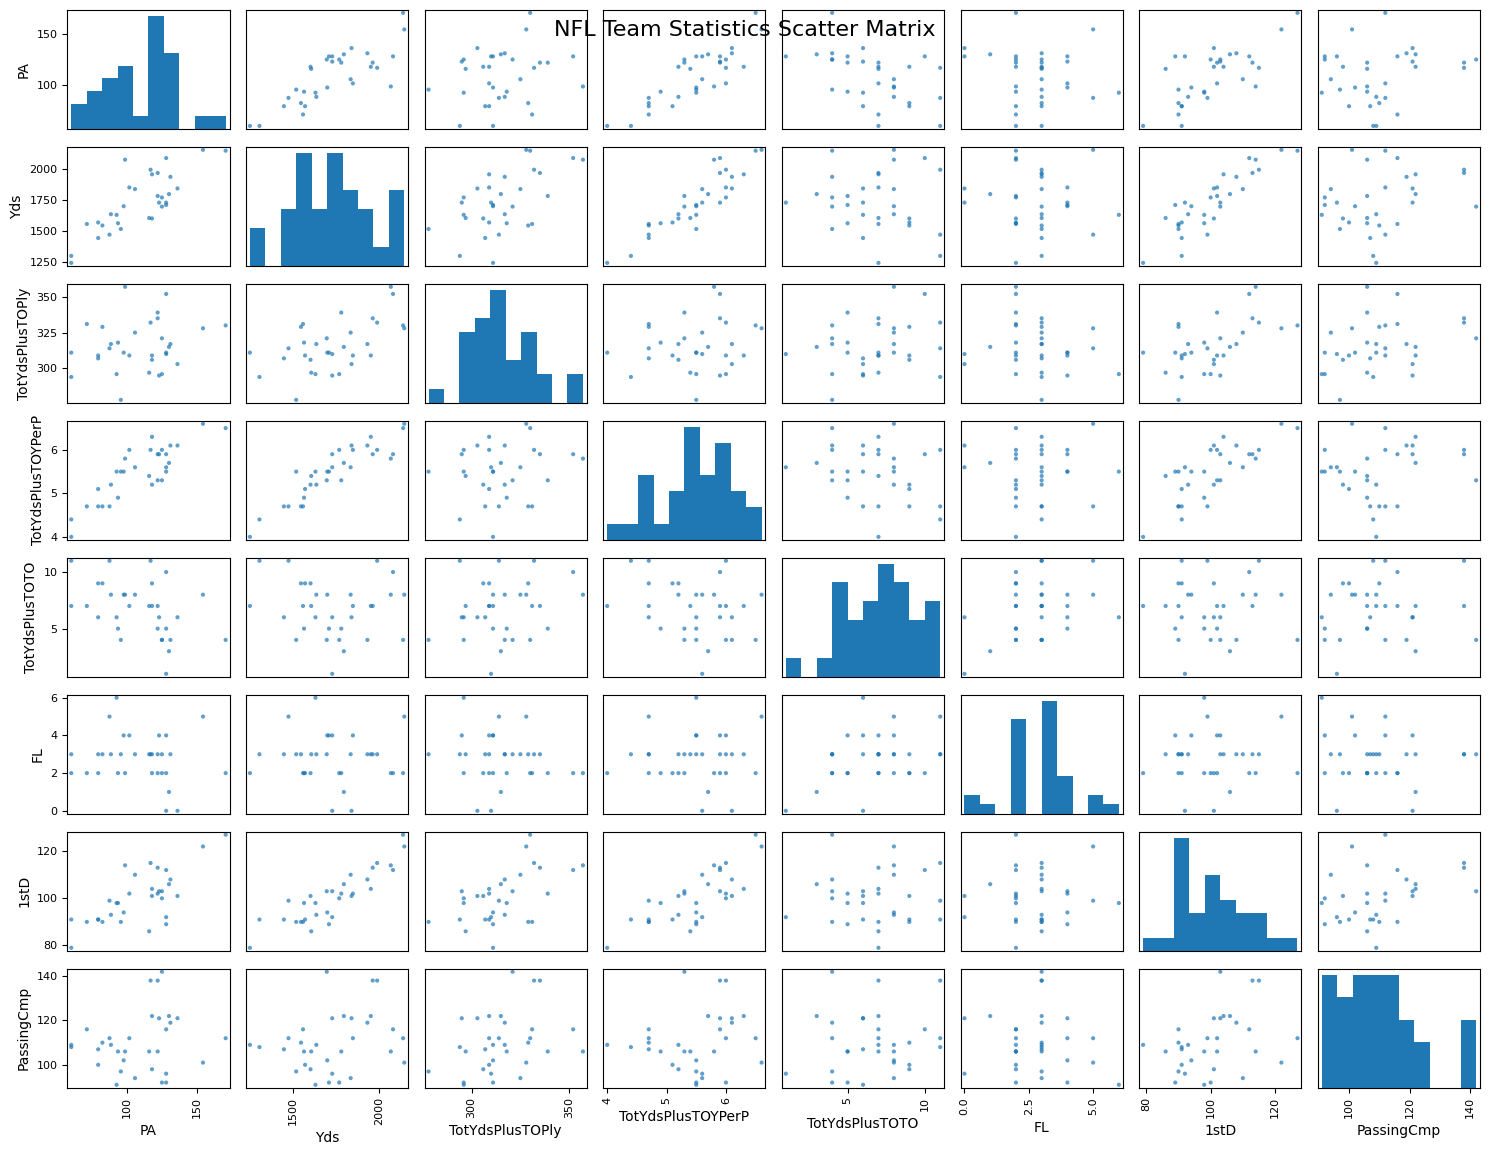

In [11]:
print("\nCreating matplotlib scatter matrix...")
fig1 = scatter_matrix.create_scatter_matrix(def_data)
plt.show()

Creating scatter matrix for columns: ['PA', 'Yds', 'TotYdsPlusTOTO', 'PassingYds', 'RushingYds', 'FL']


<Figure size 1500x1200 with 0 Axes>

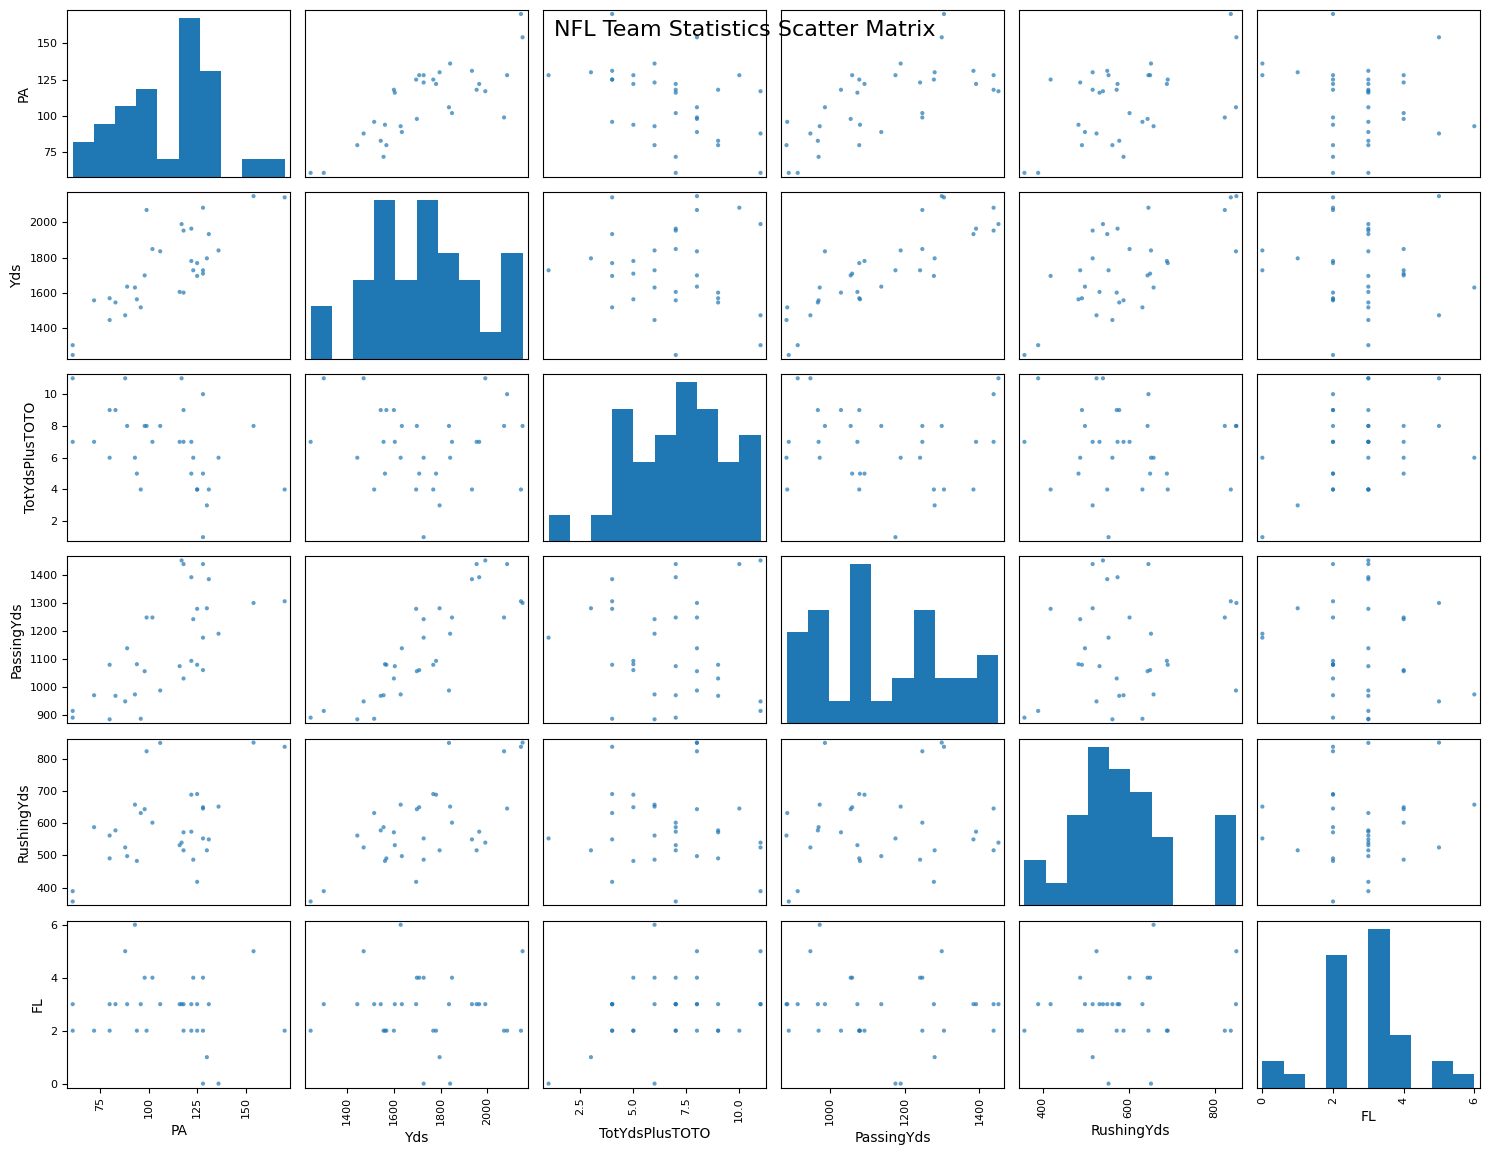

In [14]:
# Custom column selection
custom_cols = ['PA', 'Yds', 'TotYdsPlusTOTO', 'PassingYds', 'RushingYds', 'FL']
fig = scatter_matrix.create_scatter_matrix(def_data, custom_cols)

### sample offensive data

In [15]:
print("Reading offensive stats for 2022, week 6...")
def_data = weekly_reader.read_weekly_file(2022, 6, 'off', normalize=False)

Reading offensive stats for 2022, week 6...
Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/off.csv


Creating scatter matrix for columns: ['PF', 'Yds', 'TotYdsPlusTOPly', 'TotYdsPlusTOYPerP', 'TotYdsPlusTOTO', 'FL', '1stD', 'PassingCmp']


<Figure size 1500x1200 with 0 Axes>

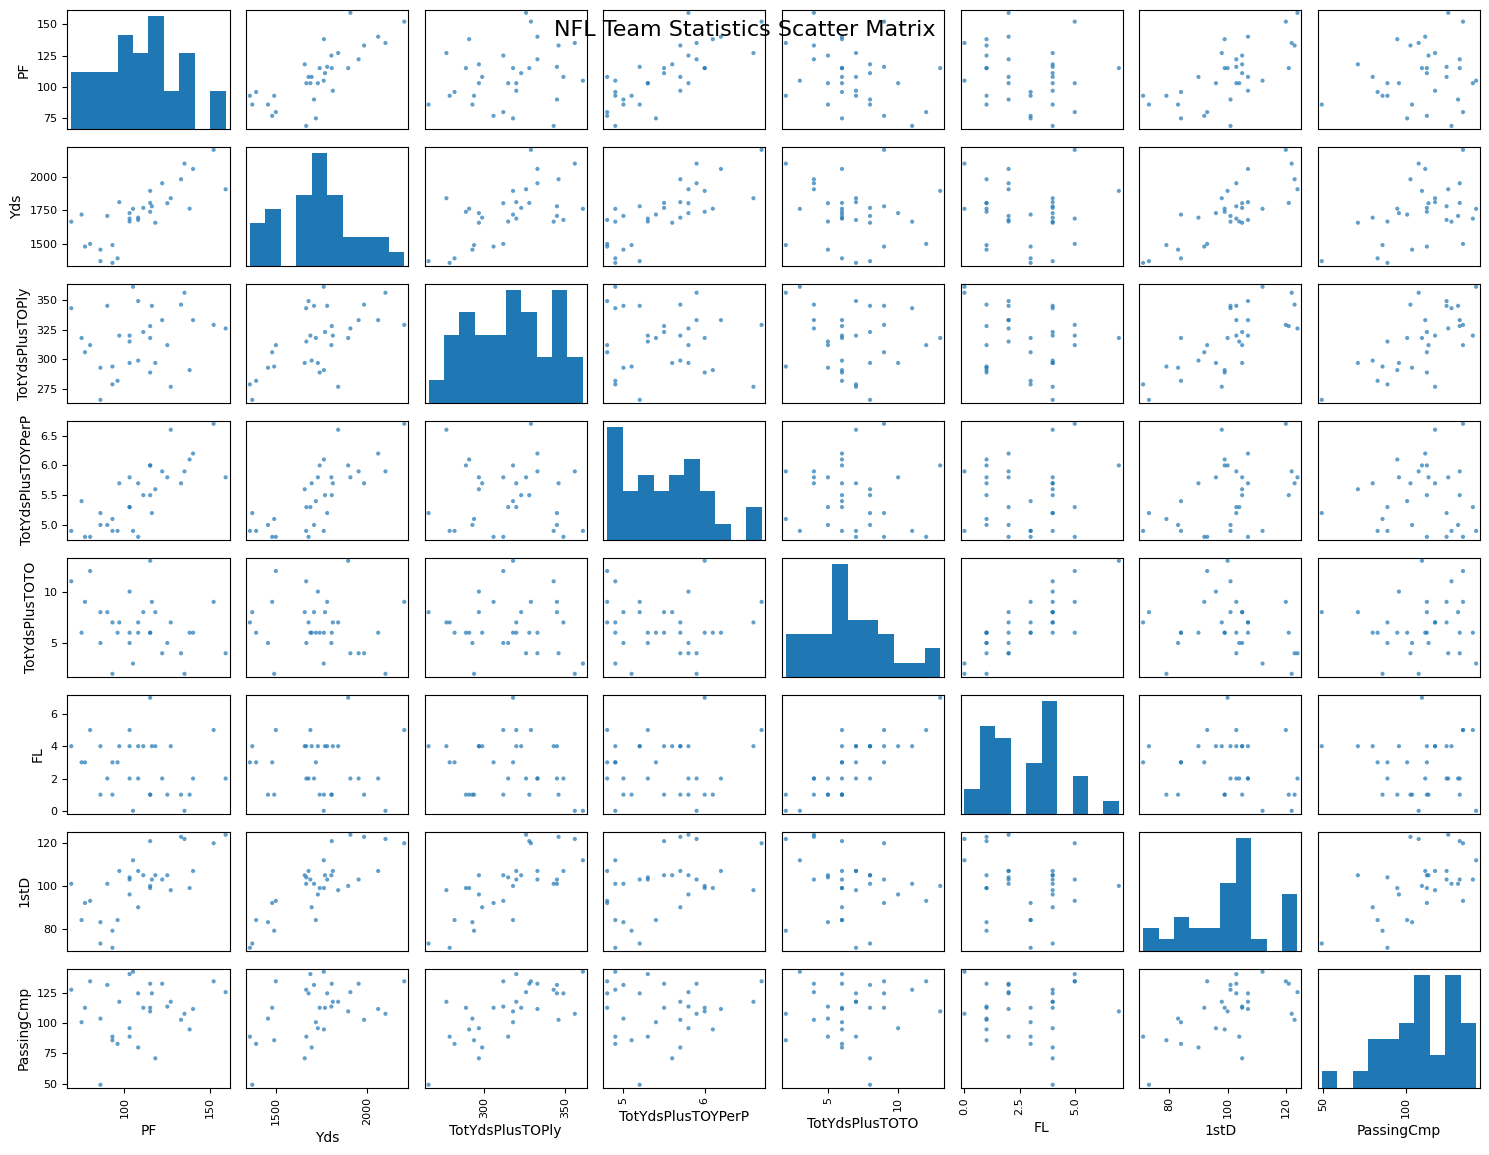

In [16]:
fig1 = scatter_matrix.create_scatter_matrix(def_data)
plt.show()

Creating scatter matrix for columns: ['PF', 'Yds', 'TotYdsPlusTOTO', 'PassingYds', 'RushingYds', 'FL']


<Figure size 1500x1200 with 0 Axes>

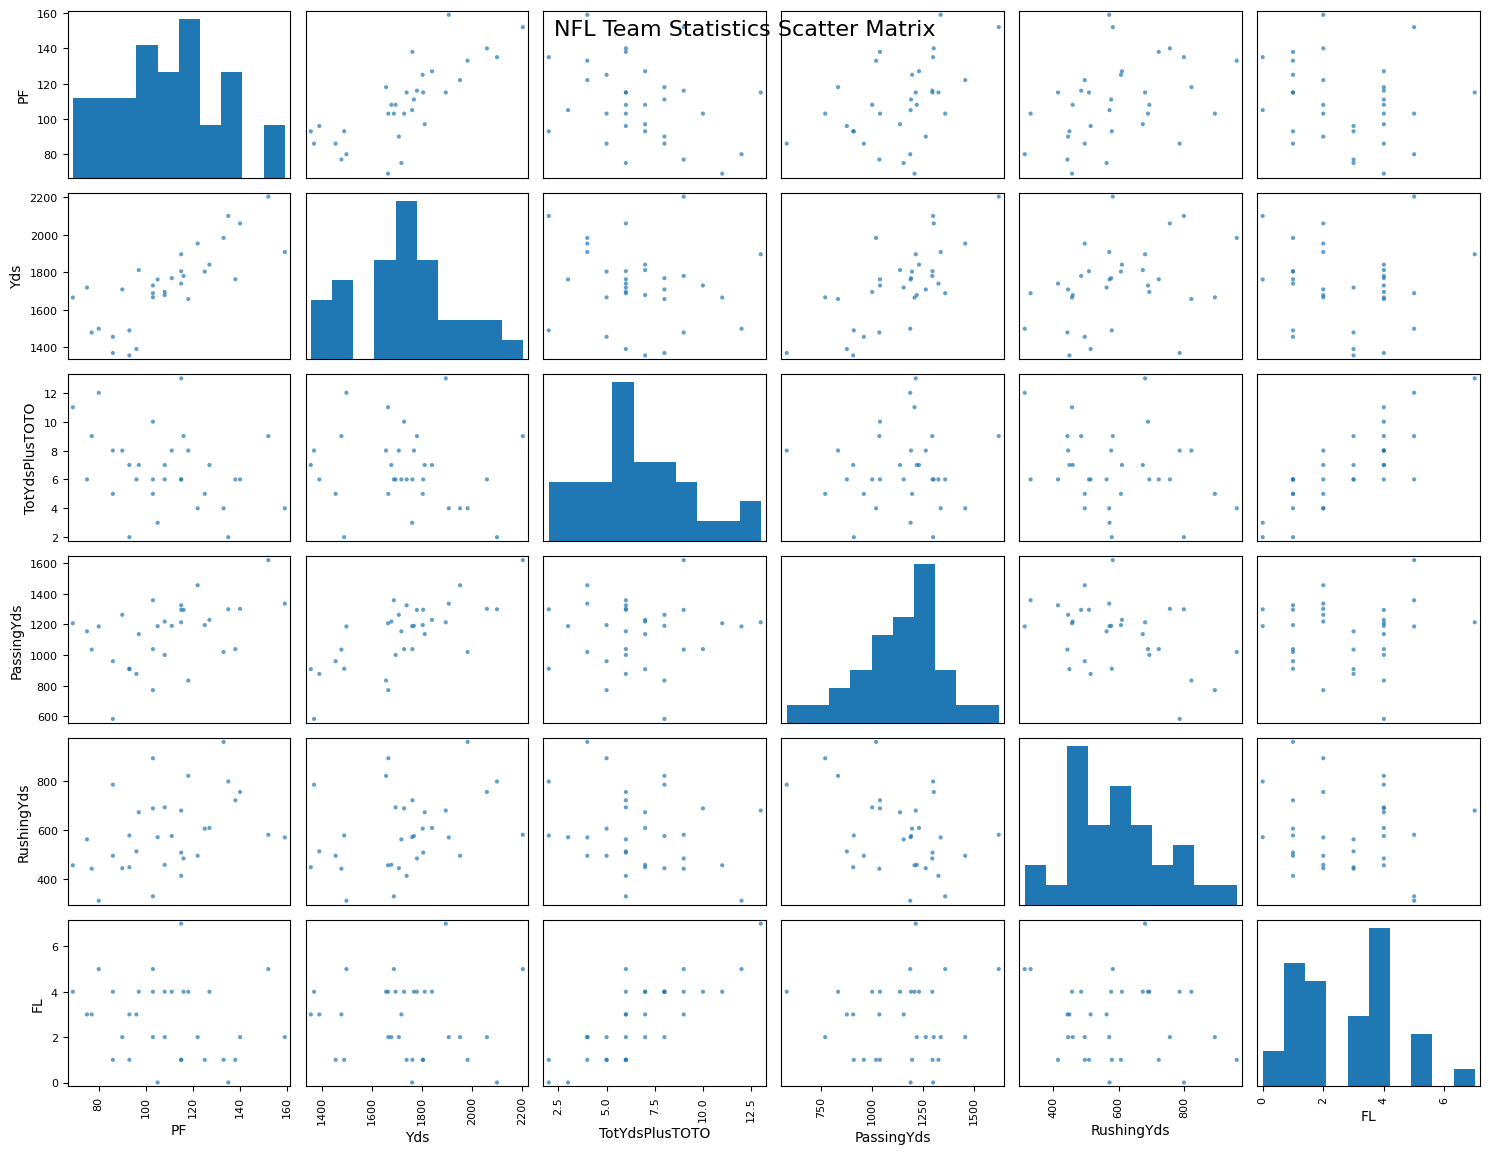

In [18]:
# Custom column selection
custom_cols = ['PF', 'Yds', 'TotYdsPlusTOTO', 'PassingYds', 'RushingYds', 'FL']
fig = scatter_matrix.create_scatter_matrix(def_data, custom_cols)

Processing CSV file: /Users/tj/nfl/notebooks/../data/2022/week06/off.csv
Creating scatter matrix for columns: ['TotYdsPlusTOYPerP', 'PassingNYPerA', 'RushingYPerA', 'Sc%', 'TO%', 'EXP', 'PFPerGame', 'YdsPerGame']


<Figure size 1500x1200 with 0 Axes>

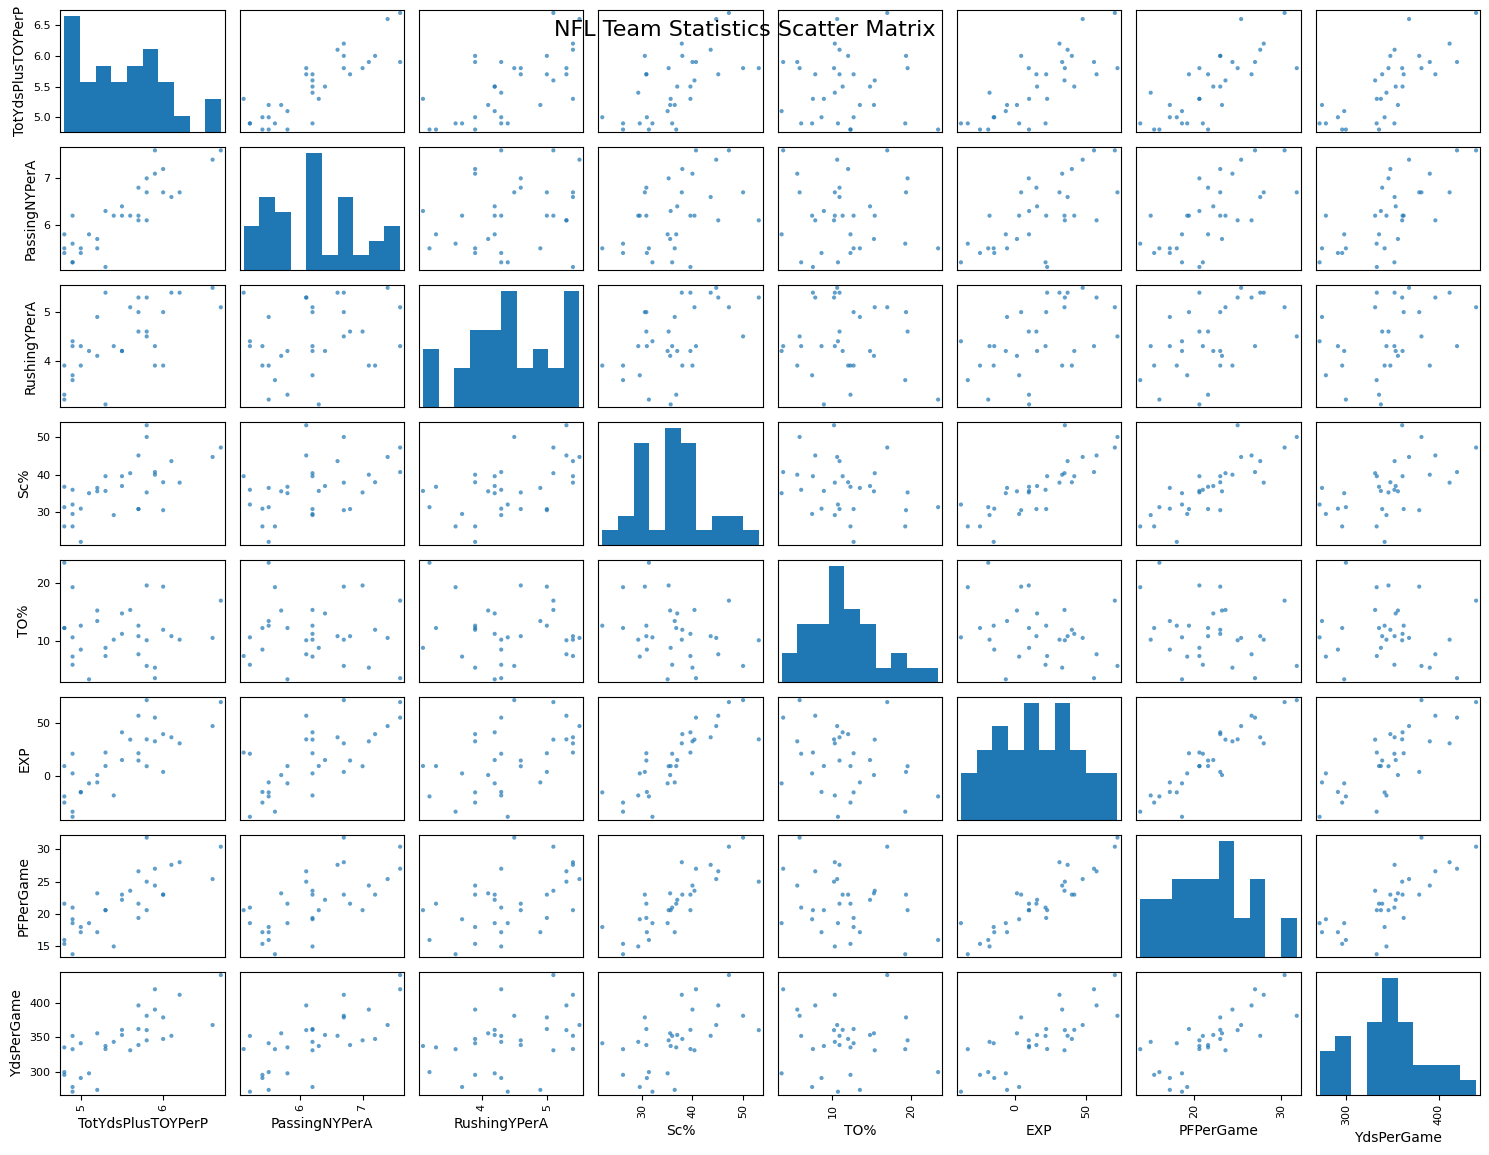

In [19]:
off_data = weekly_reader.read_weekly_file(2022, 6, 'off', normalize=True)
fig1 = scatter_matrix.create_scatter_matrix(off_data)
plt.show()

### other